# Exploratory Data Analysis
taking a deeper look into the data 

In [1]:
import pickle
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.debugger import set_trace

from hina_loader import load_full_hina_dataset
from utils import flatten_dataset

In [3]:
from jupyterthemes import jtplot
jtplot.style()

## Load and prepare the dataset

In [4]:
dataset = load_full_hina_dataset(
    '/home/ianic/ma_thesis/hina/TreningSet-HINA-200901 - 40023 documents.xml')
print(len(dataset))

39110


In [5]:
df = pd.read_pickle("/home/ianic/ma_thesis/dataset_2_with_topics_prot_4.pkl")

In [6]:
dataset_flat_1 = flatten_dataset(dataset, 1)
dataset_flat_2 = flatten_dataset(dataset, 2)
dataset_flat_3 = flatten_dataset(dataset, 3)
dataset_flat_4 = flatten_dataset(dataset, 4)

In [7]:
topics = {}

for child in dataset:
    for topic in child.topics:
        topic = topic.strip()
        if (topic not in topics):
            topics[topic] = 1
        else:
            topics[topic] += 1
print(len(topics))

1229


## Raw topics
Let's take a look at the raw topics, the taxonomy, and the topic distribution across hierarchy levels

In [8]:
print(list(topics.items())[0:3])

[('PRAVOSUĐE/SUDSTVO/KRIMINAL|PRAVOSUĐE|Sudovi|Općinski / lokalni sudovi', 654), ('PRAVOSUĐE/SUDSTVO/KRIMINAL|PRAVOSUĐE', 1676), ('PRAVOSUĐE/SUDSTVO/KRIMINAL|KRIMINAL|Kaznena djela protiv zdravlja ljudi|Nesavjesno liječenje', 128)]


In [9]:
od = OrderedDict(sorted(topics.items()))

ch = None
with open('/home/ianic/ma_thesis/ch.pickle', 'rb') as f:
    _ch = pickle.load(f)
    ch = _ch
ch.print_()

└─topics
  ├─DRUŠTVO
  │ ├─DRUŠTVO|DEMOGRAFIJA
  │ ├─DRUŠTVO|DONACIJE
  │ ├─DRUŠTVO|HUMANITARNI RAD
  │ ├─DRUŠTVO|INVALIDI
  │ ├─DRUŠTVO|LJUDSKA PRAVA
  │ ├─DRUŠTVO|NAGRADE I PRIZNANJA
  │ ├─DRUŠTVO|NASILJE (u društvu)
  │ ├─DRUŠTVO|OBITELJ
  │ ├─DRUŠTVO|OBLJETNICE
  │ ├─DRUŠTVO|OBNOVA
  │ ├─DRUŠTVO|OVISNOST
  │ ├─DRUŠTVO|SEKSUALNOST/SPOLNOST
  │ └─DRUŠTVO|SOCIJALNA SKRB
  ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|EKONOMIJA OPĆENITO
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|FINANCIJE
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|GOSPODARSKO POSLOVANJE
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|INDUSTRIJA
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|MAKROEKONOMIJA
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|POLJOPRIVREDA
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|PROMET
  │ ├─GOSPODARSTVO/POSLOVANJE/FINANCIJE|TRGOVINA
  │ └─GOSPODARSTVO/POSLOVANJE/FINANCIJE|TURIZAM I UGOSTITELJSTVO
  ├─KATASTROFE I NESREĆE
  │ ├─KATASTROFE I NESREĆE|INDUSTRIJSKE NESREĆE
  │ ├─KATASTROFE I NES

In [10]:
keys = list(od.keys())
topics_hierch = []
for key in keys:
    topics_hierch.append(re.split(r'[|]\s*', key))

split_subtopics_per_depth = {}

for node in topics_hierch:
    for idx, item in enumerate(node):
        item = item.strip()
        if (idx not in split_subtopics_per_depth):
            split_subtopics_per_depth[idx] = set()
            split_subtopics_per_depth[idx].add(item)
        else:
            split_subtopics_per_depth[idx].add(item)

In [11]:
print(f"hierarchy size, depth:{len(split_subtopics_per_depth)}")
print(f"hierarchy lvl 1, size:{len(split_subtopics_per_depth[0])}")
print("="*50)
print(sorted(split_subtopics_per_depth[0]))
print(f"hierarchy lvl 2, size:{len(split_subtopics_per_depth[1])}")
print("="*50)
print(sorted(split_subtopics_per_depth[1]))
print(f"hierarchy lvl 3, size:{len(split_subtopics_per_depth[2])}")
print("="*50)
print(sorted(split_subtopics_per_depth[2]))
print(f"hierarchy lvl 4, size:{len(split_subtopics_per_depth[3])}")
print("="*50)
print(sorted(split_subtopics_per_depth[3]))
print(f"hierarchy lvl 5, size:{len(split_subtopics_per_depth[4])}")
print("="*50)
print(sorted(split_subtopics_per_depth[4]))

hierarchy size, depth:5
hierarchy lvl 1, size:17
['DRUŠTVO', 'GOSPODARSTVO/POSLOVANJE/FINANCIJE', 'KATASTROFE I NESREĆE', 'KULTURA  I UMJETNOST', 'MEDIJI', 'NEMIRI/SUKOBI/RATOVI', 'OBAVIJESTI I UPOZORENJA', 'ODGOJ I OBRAZOVANJE', 'POLITIKA', 'PRAVOSUĐE/SUDSTVO/KRIMINAL', 'RAD', 'RELIGIJA I VJEROVANJE', 'SPORT', 'ZANIMLJIVOSTI', 'ZAŠTITA OKOLIŠA', 'ZDRAVLJE', 'ZNANOSTI I TEHNOLOGIJA']
hierarchy lvl 2, size:200
['AMERIČKI NOGOMET', 'ARHITEKTURA', 'ARHIVI', 'ATEIZAM', 'ATLETIKA', 'BADMINTON', 'BALET / PLES', 'BASEBALL', 'BICIKLIZAM', 'BILJAR', 'BIOMEDICINA I ZDRAVSTVO', 'BIOTEHNIČKE ZNANOSTI', 'BOLESTI', 'BORILAČKI SPORTOVI I VJEŠTINE', 'BOĆANJE', 'DEMOGRAFIJA', 'DIZAJN', 'DOGAĐAJI', 'DOMOVINSKI RAT', 'DONACIJE', 'DOPING', 'DRUŠTVENE ZNANOSTI', 'DRŽAVNO ODVJETNIŠTVO / TUŽITELJSTVO', 'EKONOMIJA OPĆENITO', 'EKSTREMNI SPORTOVI', 'ENCIKLOPEDIKA / LEKSIKOGRAFIJA', 'FESTIVALI', 'FILATELIJA', 'FILM', 'FINANCIJE', 'FOTOGRAFIJA', 'GALERIJE', 'GASTRONOMIJA', 'GLAZBA', 'GOLF', 'GOSPODARSKI KRIMINAL'

## Let's take a glance at some brief high-level stats

In [12]:
print("average depth:")
print(sum(map(len, topics_hierch))/float(len(topics_hierch)))

total = 0
for d in dataset:
    total += len(d.topics)

print("average num of topics:")
print(total/len(dataset))

total = 0
for d in dataset_flat_2:
    total += len(d.topics)
print("average num of topics-flat: lvl 2")
print(total/len(dataset_flat_2))

average depth:
3.1065907241659887
average num of topics:
3.5048836614676553
average num of topics-flat: lvl 2
2.623906929174124


## Topic counts per article

In [13]:
def get_topics_len(df, length):
    return df[(df['topics'].str.len() == length)].shape[0]

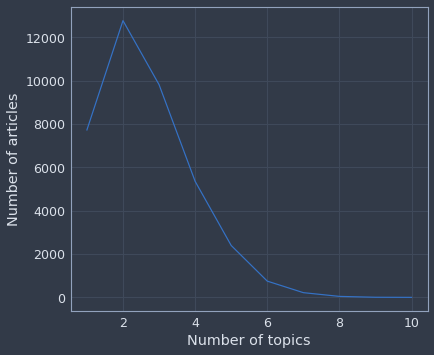

In [14]:
x = np.linspace(1, 10, 10).astype(int).tolist()
y = [get_topics_len(df, z) for z in x]

plt.xlabel('Number of topics')
plt.ylabel('Number of articles')
plt.plot(x, y)

## Topic counts per hierarchy level

In [15]:
# get counts for dataset_flat_1
topics_flat_1 = {}

for child in dataset_flat_1:
    for topic in child.topics:
        if (topic not in topics_flat_1):
            topics_flat_1[topic] = 1
        else:
            topics_flat_1[topic] += 1

# get counts for dataset_flat_1
topics_flat_2 = {}

for child in dataset_flat_2:
    for topic in child.topics:
        if (topic not in topics_flat_2):
            topics_flat_2[topic] = 1
        else:
            topics_flat_2[topic] += 1

# get counts for dataset_flat_2
topics_flat_3 = {}

for child in dataset_flat_3:
    for topic in child.topics:
        if (topic not in topics_flat_3):
            topics_flat_3[topic] = 1
        else:
            topics_flat_3[topic] += 1

# get counts for dataset_flat_3
topics_flat_4 = {}

for child in dataset_flat_4:
    for topic in child.topics:
        if (topic not in topics_flat_4):
            topics_flat_4[topic] = 1
        else:
            topics_flat_4[topic] += 1

In [16]:
topic_cnts_lvl_1 = list(topics_flat_1.values())
topic_cnts_lvl_2 = list(topics_flat_2.values())
topic_cnts_lvl_3 = list(topics_flat_3.values())
topic_cnts_lvl_4 = list(topics_flat_4.values())
topic_cnts_lvl_5 = list(topics.values())

/home/ianic/.conda/envs/dipl/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Topic counts')

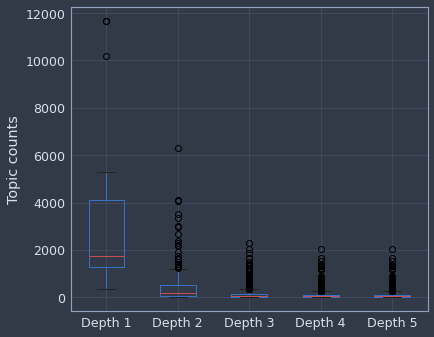

In [17]:
df5 = pd.DataFrame(topic_cnts_lvl_5, columns=["Depth 5"])
df1 = pd.DataFrame(topic_cnts_lvl_1, columns=["Depth 1"])
df2 = pd.DataFrame(topic_cnts_lvl_2, columns=["Depth 2"])
df3 = pd.DataFrame(topic_cnts_lvl_3, columns=["Depth 3"])
df4 = pd.DataFrame(topic_cnts_lvl_4, columns=["Depth 4"])

cdf = pd.concat([df1, df2, df3, df4, df5])

bplot = cdf.boxplot(showfliers=True)
bplot.set_ylabel('Topic counts')

/home/ianic/.conda/envs/dipl/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Topic counts')

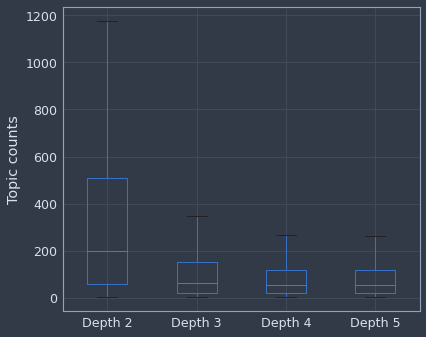

In [18]:
cdf = pd.concat([df2, df3, df4, df5])

bplot = cdf.boxplot(showfliers=False)
bplot.set_ylabel('Topic counts')

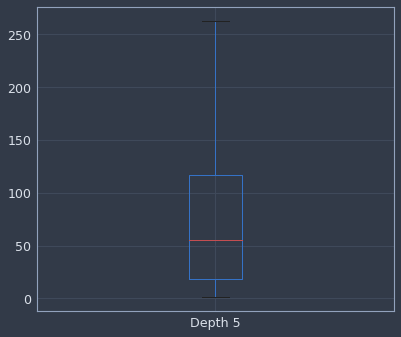

In [19]:
df5.boxplot(showfliers=False)

## Let's strip off topics with low number of occurrencies and see the distributions again

/home/ianic/.conda/envs/dipl/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Articles')

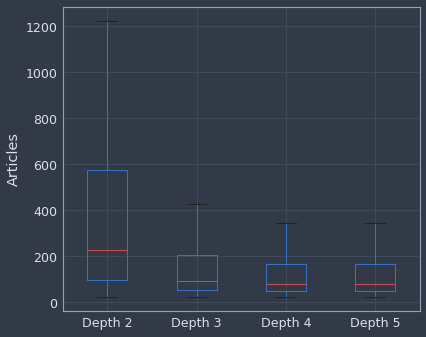

In [20]:
topic_cnts_lvl_1_strip = list(filter(lambda x: x > 20, topic_cnts_lvl_1))
topic_cnts_lvl_2_strip = list(filter(lambda x: x > 20, topic_cnts_lvl_2))
topic_cnts_lvl_3_strip = list(filter(lambda x: x > 20, topic_cnts_lvl_3))
topic_cnts_lvl_4_strip = list(filter(lambda x: x > 20, topic_cnts_lvl_4))
topic_cnts_lvl_5_strip = list(filter(lambda x: x > 20, topic_cnts_lvl_5))

df1_strip = pd.DataFrame(topic_cnts_lvl_1_strip, columns=["Depth 1"])
df2_strip = pd.DataFrame(topic_cnts_lvl_2_strip, columns=["Depth 2"])
df3_strip = pd.DataFrame(topic_cnts_lvl_3_strip, columns=["Depth 3"])
df4_strip = pd.DataFrame(topic_cnts_lvl_4_strip, columns=["Depth 4"])
df5_strip = pd.DataFrame(topic_cnts_lvl_5_strip, columns=["Depth 5"])

cdf_strip = pd.concat([df2_strip, df3_strip, df4_strip, df5_strip])

bplot_strip = cdf_strip.boxplot(showfliers=False)
bplot_strip.set_ylabel('Articles')

## Word frequencies

In [21]:
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame(
        {'word': list(fdist.keys()), 'count': list(fdist.values())})

    if (terms < 0):
        # selecting 20 least frequent words
        d = words_df.nsmallest(columns="count", n=-terms)
        plt.figure(figsize=(15, -terms / 5))
    else:
        # selecting 20 most frequent words
        d = words_df.nlargest(columns="count", n=terms)
        plt.figure(figsize=(15, terms / 5))
    ax = sns.barplot(data=d, x="count", y="word", color='lightseagreen')
    ax.set(ylabel='Word')

    plt.show()
    return words_df.shape[0]


def all_words(x):
    words = ' '.join([text for text in x])
    words = words.split()
    return list(set(words))

#### preprocessed text

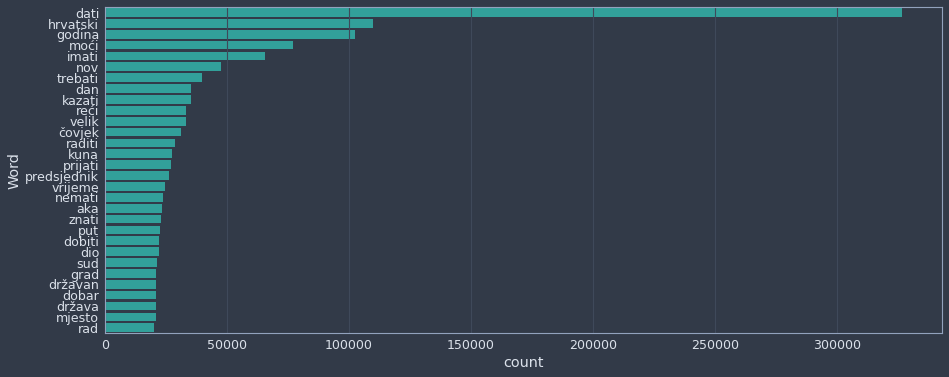

361363


In [22]:
size = freq_words(df['clean_text'], 30)
print(size)

#### unprocessed text

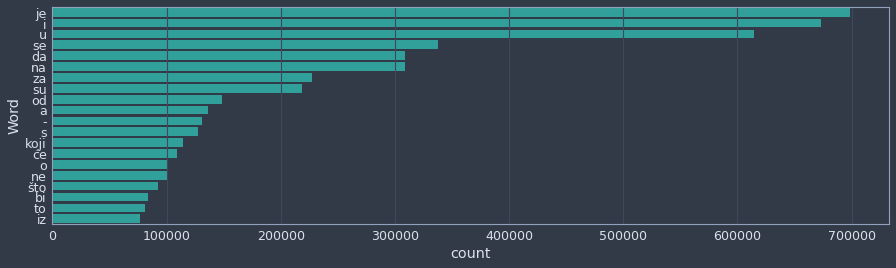

1378059


In [23]:
size = freq_words(df['text'], 20)
print(size)

## Document lengths
For different approaches (NLTK tokenizer, BERT tokenizer)

In [ ]:
from bert import modeling, optimization, run_classifier, tokenization

# use downloaded model, change path accordingly
base_path = ("/home/ianic/pretrain/multilingual_L-12_H-768_A-12")

BERT_VOCAB = base_path + '/bert_vocab.txt'
BERT_INIT_CHKPNT = base_path + '/bert_model.ckpt'
BERT_CONFIG = base_path + '/config.json'

tokenization.validate_case_matches_checkpoint(True, BERT_INIT_CHKPNT)
tokenizer = tokenization.FullTokenizer(
    vocab_file=BERT_VOCAB, do_lower_case=True)

lens = df.iloc[:, 0].map(tokenizer.tokenize)

Text(0, 0.5, 'Document lenghts')

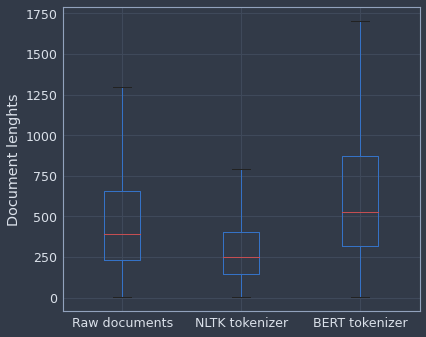

In [25]:
def_tkn_lens_df = pd.DataFrame(df["clean_text_tokenized"].map(len))
def_tkn_lens_df.columns = ["NLTK tokenizer"]

no_tkn_lens_df = pd.DataFrame(df["text"].map(lambda x: len(x.split(" "))))
no_tkn_lens_df.columns = ["Raw documents"]

bert_lens_df = pd.DataFrame(lens.map(len))
bert_lens_df.columns = ["BERT tokenizer"]

cdf = pd.concat([no_tkn_lens_df, def_tkn_lens_df, bert_lens_df])
plot = cdf.boxplot(showfliers=False)
plot.set_ylabel('Document lenghts')